In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

data.isnull().sum()

In [5]:
data.shape

(918, 12)

In [6]:
x=data.drop(columns=['HeartDisease'])
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [7]:
y=data.HeartDisease
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [9]:
x_train.shape

(596, 11)

In [10]:
x_test.shape

(322, 11)

In [11]:
x.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
x.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [13]:
x.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [14]:
nom_cols=[2,6,10]
ord_cols=[1,8]

In [15]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans=make_column_transformer((OneHotEncoder(sparse='false'),nom_cols),(OrdinalEncoder(),ord_cols),
                                                         remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse='false'),
                                 [2, 6, 10]),
                                ('ordinalencoder', OrdinalEncoder(), [1, 8])])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
algorithm=KNeighborsClassifier(n_neighbors=30)
algorithm

KNeighborsClassifier(n_neighbors=30)

In [17]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trans,algorithm)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [18]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [19]:
pred=pipe.predict(x_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [20]:
y_test

43     0
482    1
177    0
608    1
834    0
      ..
909    1
350    1
545    0
35     0
277    1
Name: HeartDisease, Length: 322, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

69.87577639751554

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

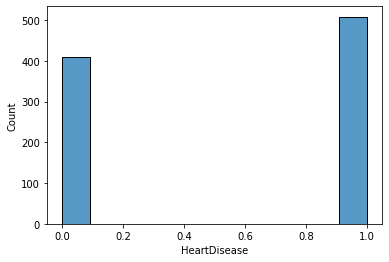

In [22]:
import seaborn as sns
sns.histplot(data.HeartDisease)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HeartDisease', ylabel='Density'>

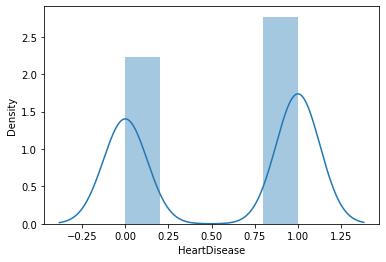

In [23]:
import seaborn as sns
sns.distplot(data.HeartDisease)

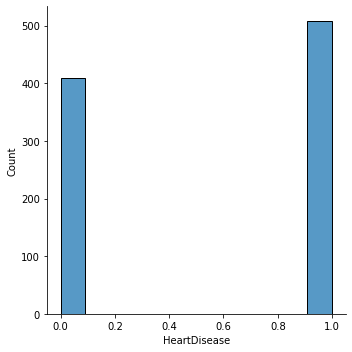

In [24]:
import seaborn as sns
sns.displot(data.HeartDisease)

In [25]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
o_x,o_y=over.fit_resample(x,y)
o_y.value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
s=SMOTE()
n_pipe=make_pipeline(trans,s,algorithm)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [27]:
n_pipe.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=30))])

In [28]:
pred_n=n_pipe.predict(x_test)
pred_n

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [29]:
accuracy_score(pred_n,y_test)*100

71.42857142857143

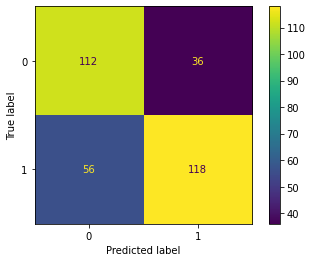

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(n_pipe,x_test,y_test)

In [31]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
import numpy as np
new=np.array([20,'M','ASY',140,200,0,'Normal',100,'Y',1.2,'Flat']).reshape(1,11)
pipe.predict(new)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


array([1])

In [33]:
x.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up


In [34]:
new_1=np.array([36,'F','ASY',160,270,0,'Normal',150,'Y',1.2,'Flat']).reshape(1,11)
pipe.predict(new_1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


array([0])

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [36]:
algorithm1=LogisticRegression(solver='liblinear')
algorithm2=KNeighborsClassifier()
algorithm3=DecisionTreeClassifier()

In [37]:
vote=VotingClassifier(estimators=[('x1',algorithm1),('x2',algorithm2),('x3',algorithm3)],voting='soft',verbose=True)

In [38]:
pipe_1=make_pipeline(trans,vote)
pipe_1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('x1',
                                               LogisticRegression(solver='liblinear')),
                                              ('x2', KNeighborsClassifier()),
                                              ('x3', DecisionTreeClassifier())],
                                  verbose=True, voting='soft'))])

In [39]:
pipe_1.fit(x_train,y_train)

[Voting] ....................... (1 of 3) Processing x1, total=   0.0s
[Voting] ....................... (2 of 3) Processing x2, total=   0.0s
[Voting] ....................... (3 of 3) Processing x3, total=   0.0s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('x1',
                                               LogisticRegression(solver='liblinear')),
                                              ('x2', KNeighborsClassifier()),
                                              ('x3', DecisionTreeClassifier())],
                                  verbose=True, voting='soft'))])

In [40]:
pred1=pipe_1.predict(x_test)
pred1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [41]:
accuracy_score(pred1,y_test)*100

83.85093167701864

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params={'criterion':['gini','entropy'],'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_z=make_pipeline(trans,GridSearchCV(algorithm3,params,verbose=3,refit=True))
pipe_z

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [43]:
pipe_z.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.731, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.832, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=2 .............
[CV]  criterion=gini, max_depth=None, min_samples_split=2, score=0.840, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_split=10 ............
[CV]  criterion=gini, max_depth=None, min_samples_split=10, score=0.783, total=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=100, score=0.817, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=10, min_samples_split=100, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=10, min_samples_split=100, score=0.798, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=10, min_samples_split=100, score=0.857, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=100 .............
[CV]  criterion=gini, max_depth=10, min_samples_split=100, score=0.857, total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_split=2 ..........
[CV]  criterion=entropy, max_depth=None, min_samples_split=2, score=0.733, total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_split=2 ..........
[CV]  criterion=entropy, max_depth=None, min_samples_sp

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 2, 5, 10],
                                          'min_samples_split': [2, 10, 100]},
                              verbose=3))])

In [44]:
pred_2=pipe_z.predict(x_test)
pred_2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [45]:
accuracy_score(pred_2,y_test)*100

81.36645962732919

In [46]:
pipe_z.named_steps['gridsearchcv'].best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [47]:
params_1={'criterion':['entropy'],'max_depth':[5],'min_samples_split':[2]}
pipe_x=make_pipeline(trans,GridSearchCV(algorithm3,params_1,verbose=3,refit=True))
pipe_x

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [5],
                                          'min_samples_split': [2]},
                              verbose=3))])

In [48]:
pipe_x.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.783, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.882, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.891, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.857, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [5],
                                          'min_samples_split': [2]},
                              verbose=3))])

In [49]:
pred_3=pipe_x.predict(x_test)
pred_3

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [50]:
accuracy_score(pred_3,y_test)*100

80.74534161490683

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params_2={'criterion':['gini','entropy'],'max_depth':[None,2,5,10],'min_samples_split':[2,10,100]}
pipe_y=make_pipeline(trans,RandomizedSearchCV(algorithm3,params_2,verbose=3,refit=True))
pipe_y

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [52]:
pipe_y.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=10, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=2, criterion=gini, score=0.817, total=   0.0s
[CV] min_samples_split=10, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=2, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=10, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=2, criterion=gini, score=0.807, total=   0.0s
[CV] min_samples_split=10, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=2, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=10, max_depth=2, criterion=gini ...............
[CV]  min_samples_split=10, max_depth=2, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=100, max_depth=None, criterion=gini ...........
[CV]  min_samples_split=100, max_depth=None, criterion=gini, score=0.817, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [53]:
pred_3=pipe_y.predict(x_test)
pred_3

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [54]:
accuracy_score(pred_3,y_test)*100

79.5031055900621

In [55]:
pipe_y.named_steps['randomizedsearchcv'].best_params_

{'min_samples_split': 10, 'max_depth': 2, 'criterion': 'gini'}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params_3={'criterion':['entropy'],'max_depth':[5],'min_samples_split':[2]}
pipe_w=make_pipeline(trans,RandomizedSearchCV(algorithm3,params_2,verbose=3,refit=True))
pipe_w

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [57]:
pipe_w.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.817, total=   0.0s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.798, total=   0.0s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=100, max_depth=5, criterion=gini ..............
[CV]  min_samples_split=100, max_depth=5, criterion=gini, score=0.857, total=   0.0s
[CV] min_samples_split=2, max_depth=5, criterion=gini ................
[CV]  min_samples_split=2, max_depth=5, criterion=gini, score=0.758, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                    param_distributions={'criterion': ['gini',
                                                                       'entropy'],
                                                         'max_depth': [None, 2,
                                                                       5, 10],
                                                         'min_samples_split': [2,
                                                                               10,
                                                                               100]},
                                    verbose=3))])

In [58]:
pred_4=pipe_w.predict(x_test)
pred_4

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [59]:
accuracy_score(pred_4,y_test)*100

78.57142857142857

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=400)

In [61]:
pipe_f=make_pipeline(trans,forest)
pipe_f

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=400))])

In [62]:
pipe_f.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=400))])

In [63]:
pred_5=pipe_f.predict(x_test)
pred_5

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [64]:
accuracy_score(pred_5,y_test)*100

86.64596273291926